# RFCML FEA Bending Modes

In [1]:
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt

plt.jet()

%matplotlib inline

In [2]:
dataFolder = '/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents'

#read SA data
dfSA = scipy.io.loadmat(dataFolder+'/M1 Testing/RFCML Optical Testing/bending modes/actCoords.mat')
sax_ml = dfSA['yAct']/1e3 #turn into meter #swap x/y to get to M1B (M1DCS uses M1B!!!)
say_ml = dfSA['xAct']/1e3 #turn into meter
print('ML actuators = ', len(sax_ml), len(say_ml))

#read Afz (Fz influence matrix)
df = scipy.io.loadmat(dataFolder+'/M1 Testing/RFCML Optical Testing/bending modes/influenceFunctions.mat')
Afn_ml = df['interactionMat']
fv_ml = df['forceMat'] #fv = fv^T
print('Afn = ',Afn_ml.shape)
print('fv = ', fv_ml.shape)
# this is Afz only; it is 6991 x 170.

#read Fz Bending Mode 
mat = scipy.io.loadmat(dataFolder+'/M1 Testing/RFCML Optical Testing/bending modes/SVD.mat')
UMat_ml = mat['U']
SMat_ml = mat['S']
VMat_ml = mat['V']
print('U matrix', UMat_ml.shape)

#read FEA nodes data
mat = scipy.io.loadmat(dataFolder+'/M1 Testing/RFCML Optical Testing/bending modes/nodeCoords.mat')
nodex_ml = mat['y']/1e3 #turn into meter #swap x/y to get to M1B (M1DCS uses M1B!!!)
nodey_ml = mat['x']/1e3 #turn into meter
print('N node = ', len(nodex_ml))

############normalize bending modes to RMS = 1um ###################
UMat_ml *= np.sqrt(UMat_ml.shape[0])
for modeID in range(1, UMat_ml.shape[1]+1):
    VMat_ml[:, modeID-1] *= 1e3/SMat_ml[modeID-1, modeID-1]*np.sqrt(UMat_ml.shape[0]) 
    #1e3 due to nanometer to micron conversion; RFCML mode shapes are in nanometers

ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991


Text(0.5, 1.0, 'RFCML data: Actuator IDs and locations in M1-B Coordinate System')

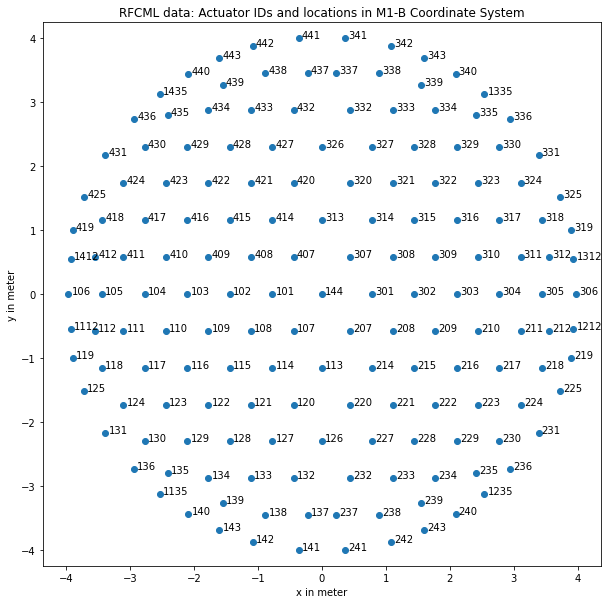

In [3]:
saID_ml = np.loadtxt('saID_ml.txt')
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(sax_ml, say_ml)
#plt.scatter(sax_ml, say_ml, s=100, facecolors='none', edgecolors='k')
for i in range(len(sax_ml)):
    plt.text(sax_ml[i]+.05, say_ml[i], '%d'%(saID_ml[i]))
plt.axis('equal')
plt.xlabel('x in meter')
plt.ylabel('y in meter')
plt.title('RFCML data: Actuator IDs and locations in M1-B Coordinate System')
#plt.grid()

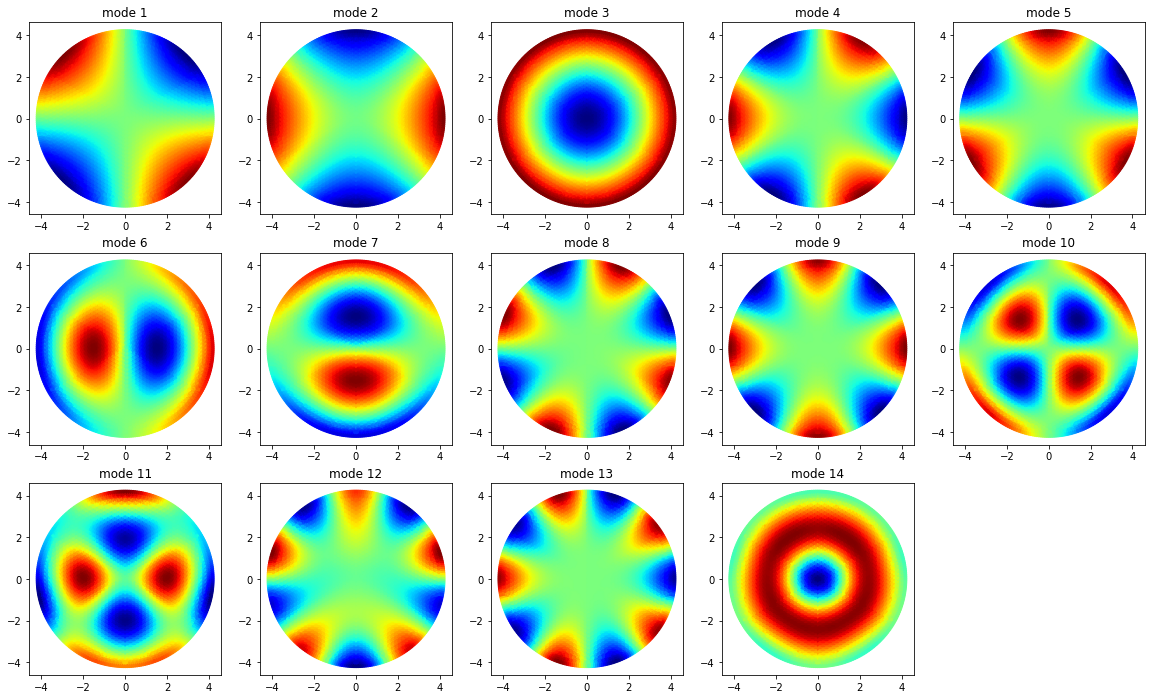

In [4]:
nrow = 3
mode_start = 1
mode_end = 14
#mode_start = 28 #15 #1
#mode_end = 46 #27 # 14
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(mode_start,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    if modeID<=mode_end:
        img = ax[irow][icol].scatter(nodex_ml, nodey_ml,10, UMat_ml[:,modeID-1])
        ax[irow][icol].set_title('mode %d'%modeID)
    else:
        ax[irow][icol].axis('off')

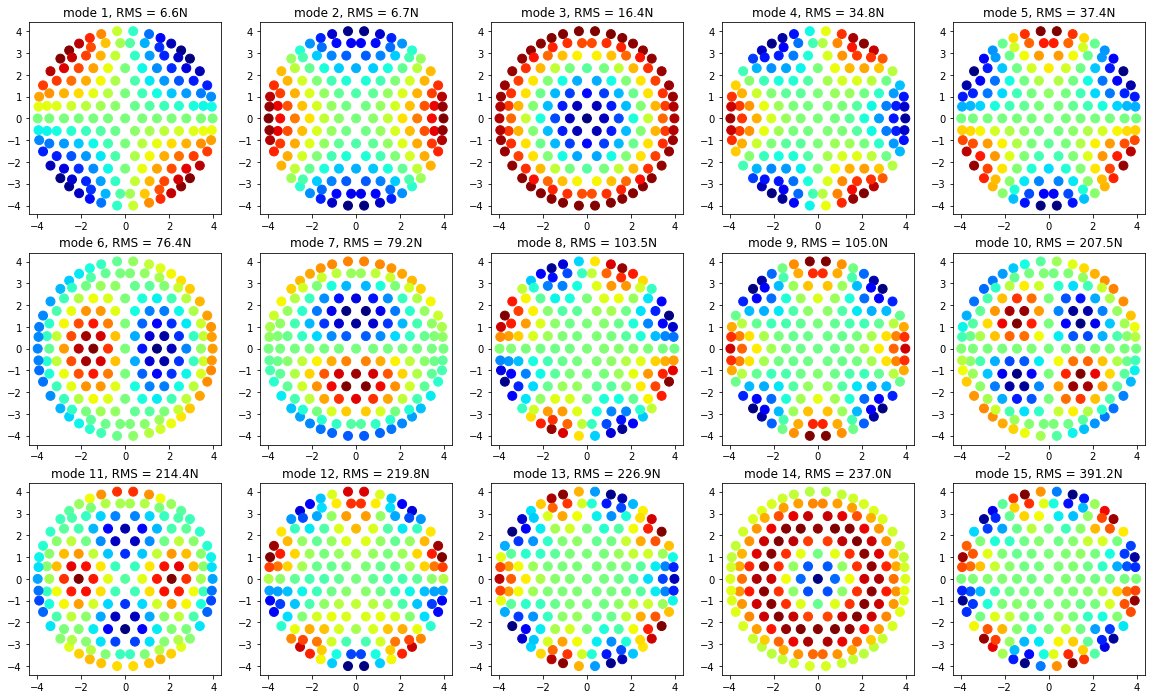

In [5]:
nrow = 3
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(sax_ml, say_ml,80, VMat_ml[:,modeID-1])
    ax[irow][icol].set_title('mode %d, RMS = %.1fN'%(modeID, np.std(VMat_ml[:,modeID-1])))

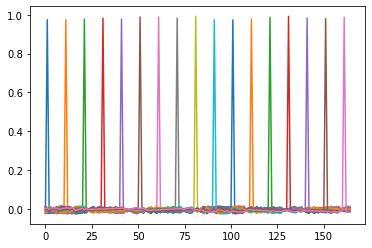

In [19]:
for i in np.arange(1,165,10):
    plt.plot(fv_ml[i,:])

### Let's try to verify that the RFCML unit load forces are linear distributions.

In [24]:
planar = fv_ml.copy()
planar[planar>0.8] = np.nan

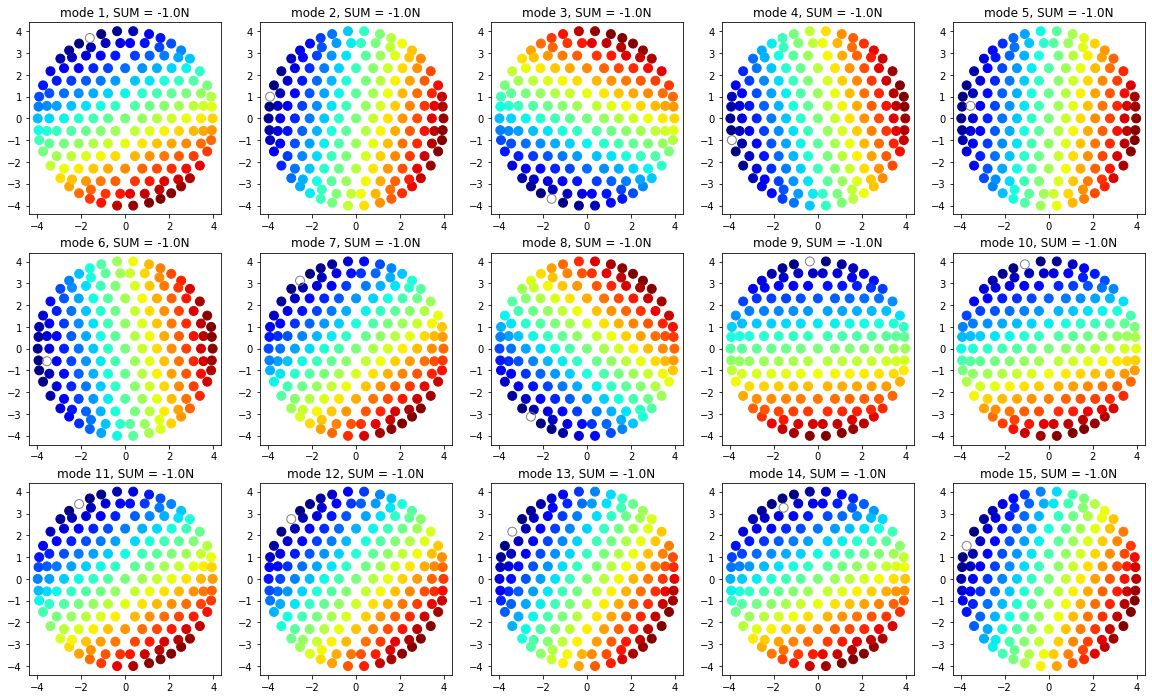

In [27]:
nrow = 3
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(sax_ml, say_ml,80, planar[modeID-1, :])
    idx = np.isnan(planar[modeID-1, :])
    ax[irow][icol].scatter(sax_ml[idx], say_ml[idx],80, edgecolors='grey', facecolors='none')
    ax[irow][icol].set_title('mode %d, SUM = %.1fN'%(modeID, np.sum(planar[modeID-1, ~idx])))

In [8]:
#check BM normalization
for i in np.arange(1,165,10):
    print('%.2f, %.2f, %+.2f'%(np.sqrt(np.sum(UMat_ml[:,i]**2)/UMat_ml.shape[0] ), 
          np.std(UMat_ml[:,i]), np.mean(UMat_ml[:,i])))

1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00


In [12]:
#check BM force normalization
for i in np.arange(1,165,10):
    print('%3d, %8.1f, %8.1f, %8.1f, %+.2f'%(i, np.sqrt(np.sum(VMat_ml[:,i]**2)/VMat_ml.shape[0] ), 
                                         np.sqrt(np.sum(VMat_ml[:,i]**2) ), 
          np.std(VMat_ml[:,i]), np.mean(VMat_ml[:,i])))

  1,      6.7,     85.9,      6.7, -0.00
 11,    219.8,   2823.8,    219.8, -0.00
 21,    659.3,   8468.3,    659.3, +0.00
 31,   1299.9,  16697.9,   1299.9, -0.00
 41,   1900.6,  24413.2,   1900.6, +0.00
 51,   2685.6,  34496.9,   2685.6, -0.00
 61,   3569.8,  45854.7,   3569.8, -0.00
 71,   4548.2,  58422.9,   4548.2, +0.01
 81,   5669.6,  72827.1,   5669.6, +0.00
 91,   6687.4,  85900.7,   6687.4, -0.00
101,   7761.6,  99700.1,   7761.6, -0.00
111,   9202.1, 118202.5,   9202.1, +0.00
121,  10455.2, 134299.2,  10455.2, +0.00
131,  11867.5, 152440.8,  11867.5, +0.00
141,  13875.2, 178230.6,  13875.2, +0.02
151,  17142.6, 220201.0,  17142.6, +0.04
161,  26606.0, 341760.6,  26606.0, +0.05


In [12]:
UMat_ml.shape[0]   

6991

In [13]:
IF_ml = Afn_ml @ fv_ml

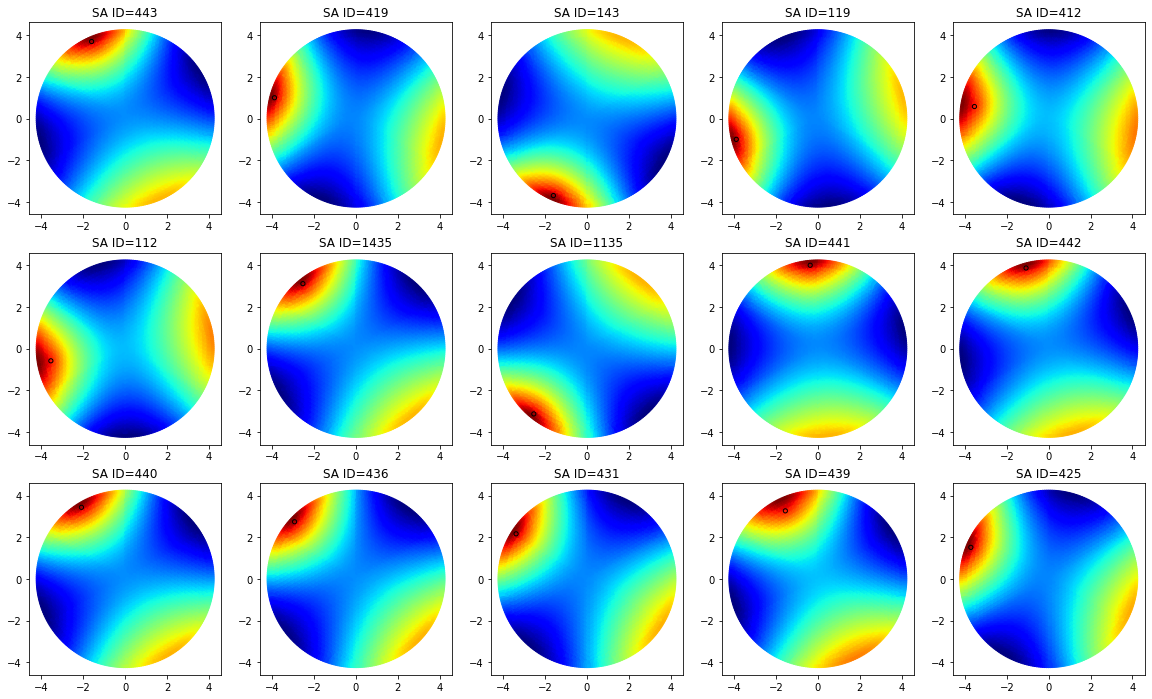

In [16]:
nrow = 3
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(nodex_ml, nodey_ml,10, IF_ml[:,modeID-1])
    ax[irow][icol].set_title('SA ID=%d'%saID_ml[modeID-1])
    circle = plt.Circle((sax_ml[modeID-1], say_ml[modeID-1]),0.1, fill=False)
    ax[irow][icol].add_artist(circle)

In [ ]:
min(nodeID)

In [ ]:
max(nodeID)